In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import plotly.express as px
import re
#import plotly.graph_objs as go
import json

dados = pd.read_csv('dados-sp-1.csv', sep=";", encoding='latin1')


In [83]:
dados[dados['idade'] > 116] = float("NaN")
print(dados.describe())

       estadoIBGE  municipioIBGE  estadoNotificacaoIBGE  \
count    999750.0   9.994860e+05          998512.000000   
mean         35.0   3.537449e+06              35.486213   
std           0.0   1.673458e+04               1.974033   
min          35.0   3.500105e+06              11.000000   
25%          35.0   3.523107e+06              35.000000   
50%          35.0   3.548708e+06              35.000000   
75%          35.0   3.550308e+06              35.000000   
max          35.0   3.557303e+06              53.000000   

       municipioNotificacaoIBGE          idade  
count              9.984210e+05  999736.000000  
mean               3.583721e+06      40.055292  
std                1.909812e+05      16.669467  
min                1.100023e+06       0.000000  
25%                3.525904e+06      29.000000  
50%                3.549805e+06      39.000000  
75%                3.550308e+06      50.000000  
max                5.300108e+06     115.000000  


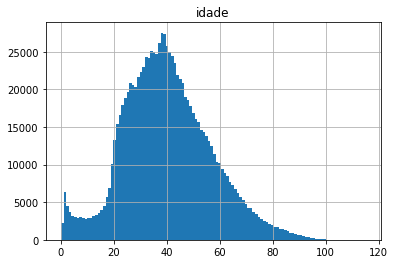

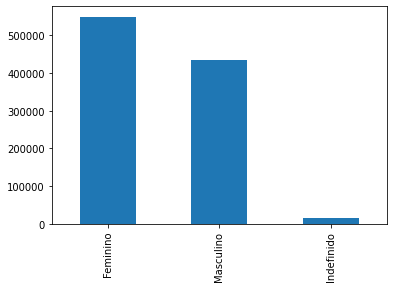

          ÿid           dataNotificacao dataInicioSintomas dataNascimento  \
0  GwLh4isfpn  2020-06-28T20:29:16.746Z                NaN      undefined   
1  DBbpaUpBHR  2020-06-28T20:29:19.237Z                NaN      undefined   
2  R0OnDOENRP  2020-06-28T20:29:21.539Z                NaN      undefined   
3  TVSXtycWQC  2020-06-28T20:29:23.949Z                NaN      undefined   
4  4WKVPEl3Bt  2020-06-28T20:29:30.854Z                NaN      undefined   

                         sintomas profissionalSaude  cbo condicoes  \
0  Outros: Paciente assintomático               NaN  NaN       NaN   
1  Outros: Paciente assintomático               NaN  NaN       NaN   
2  Outros: Paciente assintomático               NaN  NaN       NaN   
3  Outros: Paciente assintomático               NaN  NaN       NaN   
4  Outros: Paciente assintomático               NaN  NaN       NaN   

  estadoTeste                 dataTeste  ... estadoNotificacao  \
0   Concluído  2020-05-22T00:00:00.000Z  ...      

In [80]:
dados.hist(column='idade', bins=116)
plt.show()
dados['sexo'].value_counts().plot(kind='bar')
plt.show()
print(dados.head())